In [108]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import ifft, fft, fftfreq, fftshift
from scipy.signal import find_peaks

In [163]:
data_test = np.loadtxt("pulse102_detailed.dat")

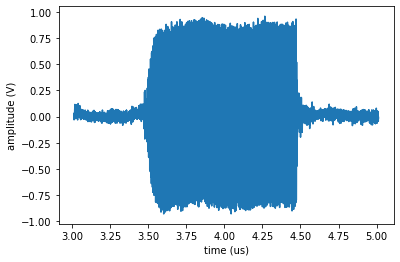

In [164]:
t = data_test.transpose()[0]*10**6
dt = (data_test.transpose()[0,1]-data_test.transpose()[0,0])*10**6
sig = data_test.transpose()[1]
plt.plot(t,sig)
plt.xlabel("time (us)")
plt.ylabel("amplitude (V)")
plt.show()

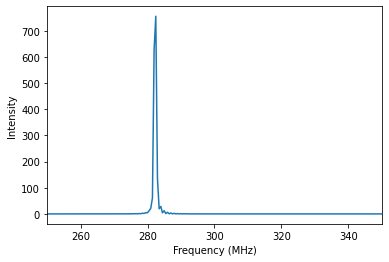

In [167]:
ft = fftshift(fft(sig, norm="ortho"))
N = len(ft)
freq = fftshift(fftfreq(N, dt))

plt.plot(freq,abs(ft)**2)
plt.xlim([250,350])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.show()

In [168]:
arr, _ = find_peaks(abs(ft), height=max(abs(ft)) / 2)

idx = arr[(len(arr) // 2) - 1]
center = freq[idx]
center

-282.47175282409813

In [169]:
freq[5395]

-2302.769723022648

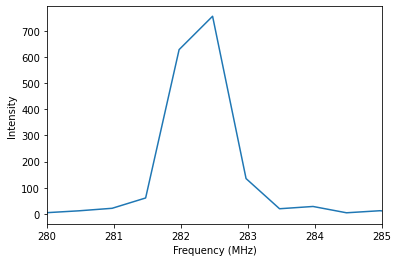

In [170]:
plt.plot(freq,abs(ft)**2)
plt.xlim([280,285])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.show()

In [171]:
dw = freq[1]-freq[0]

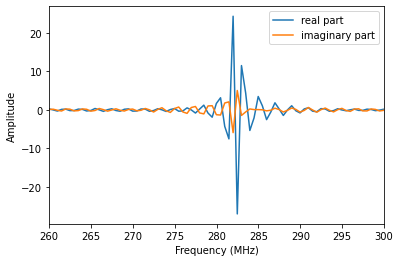

In [233]:
test = ft*np.exp( (2*np.pi*1j/360) * 180)

plt.plot(freq,np.real(test), label="real part")
plt.plot(freq,np.imag(test), label="imaginary part")
plt.xlim([260,300])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


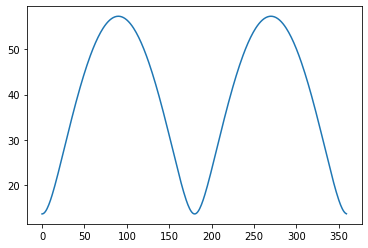

In [173]:
def test_func(theta):
    return ft*np.exp( (2*np.pi*1j/360) * theta)

ang = np.arange(0,360,1)
vals = [np.linalg.norm(np.imag(test_func(theta))) for theta in ang]

plt.plot(ang, vals)

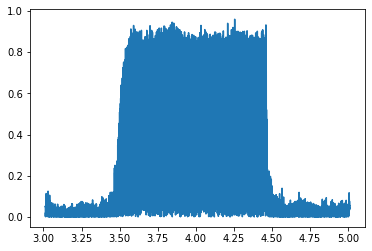

In [174]:
shifted = ifft(ft*np.exp(-1j*(center)*t),norm="ortho")
plt.plot(t,abs(shifted))
plt.show()

In [175]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [176]:
def plot_func(shift):
    shifted = ifft(fft(sig*np.exp(1j*(center+shift)*t)),norm="ortho")
    plt.plot(t,np.real(shifted))
    plt.show()

In [177]:
interact(plot_func,shift=(-2,2,.01));

interactive(children=(FloatSlider(value=0.0, description='shift', max=2.0, min=-2.0, step=0.01), Output()), _d…

In [178]:
from scipy.signal import hilbert, chirp

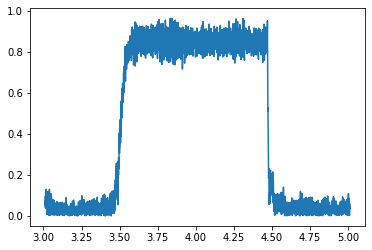

In [200]:
analytic_signal = hilbert(sig)
amplitude_envelope = np.abs(analytic_signal)
fs=dt
duration = t[-1]-t[0]
samples = N
plt.plot(t,amplitude_envelope)
plt.show()

In [235]:
def sma(data, window):
    hold = np.convolve(data, np.ones(window), "valid") / window
    return hold


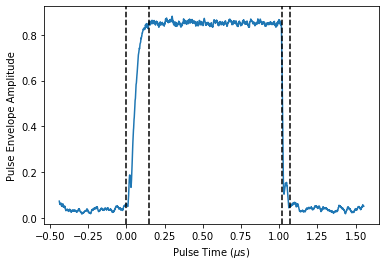

In [231]:
shift=3.45
plt.plot(t[:-99]-shift,sma(amplitude_envelope,100))
plt.axvline(3.45-shift,color="black",linestyle="--")
plt.axvline(3.6-shift,color="black",linestyle="--")

plt.axvline(4.47-shift,color="black",linestyle="--")
plt.axvline(4.52-shift,color="black",linestyle="--")

plt.xlabel(r"Pulse Time ($\mu$s)")
plt.ylabel("Pulse Envelope Amplitude")
plt.show()

In [180]:
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * fs)

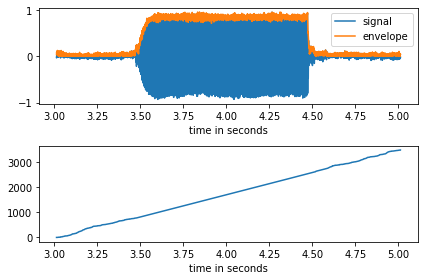

In [181]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, sig, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t, instantaneous_phase)
ax1.set_xlabel("time in seconds")
fig.tight_layout()